<a href="https://colab.research.google.com/github/nataliaguirref/A1-Introduccion-a-Bases-de-Datos-SG2/blob/experto/ReclutadosProyecciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df_resultados = pd.read_csv('drive/MyDrive/Predicciones/Resultados.csv')
df_programas = pd.read_csv('drive/MyDrive/Predicciones/Programas .csv')
df_niveles = pd.read_csv('drive/MyDrive/Predicciones/Niveles.csv')

In [4]:
df_resultados.head()

,Año,Catálogo,Pos Inac,Removidos,FFVV inicial,FFVV final,Activos,Old Actives,Reclutados,Inscritos,Tasa de Recl,Conversión a Rec,Unnamed: 12,Tipo
0,2011,C01,4856,4057,43105,44546,27490,23804,3686,4819,0.085512,0.764889,Cierre Ixtapa 20 km rec,NaN
1,2011,C02,5980,4758,44546,45071,31413,28726,2687,4636,0.060320,0.579594,Campaña de PRIMAVERA,NaN
2,2011,C03,6848,5451,45071,43690,30389,28152,2237,4386,0.049633,0.510032,NaN,NaN
3,2011,C04,4678,3922,43690,51334,36234,26541,9693,14525,0.221859,0.667332,"Croc Regional Campaign\nx1, x2, x3 rec (4 weeks)",PR1
4,2011,C05,5755,4738,51334,56935,37802,28915,8887,10285,0.173121,0.864074,NaN,NaN


In [5]:
filtered_niveles = df_niveles[['Nivel_Sponsor', 'Acumulado', '%Distribution _Sponsors', 'Nivel_Sponsor100', '%Sponsor_Ganadores', 'Nivel_Premio.1']]


In [10]:
filtered_resultados = df_resultados[['Pos Inac', 'Removidos', 'FFVV inicial ', 'FFVV final', 'Activos', 'Old Actives', 'Reclutados', 'Inscritos']]

In [11]:
filtered_resultados.corr()

,Pos Inac,Removidos,FFVV inicial,FFVV final,Activos,Old Actives,Reclutados,Inscritos
Pos Inac,1.000000,0.988864,0.857713,0.794634,0.781388,0.808066,0.328222,0.415767
Removidos,0.988864,1.000000,0.861776,0.793625,0.772483,0.803226,0.307278,0.395543
FFVV inicial,0.857713,0.861776,1.000000,0.986416,0.949950,0.959307,0.489895,0.574141
FFVV final,0.794634,0.793625,0.986416,1.000000,0.976412,0.964480,0.588392,0.664493
Activos,0.781388,0.772483,0.949950,0.976412,1.000000,0.980424,0.631572,0.708731
Old Actives,0.808066,0.803226,0.959307,0.964480,0.980424,1.000000,0.466549,0.565804
Reclutados,0.328222,0.307278,0.489895,0.588392,0.631572,0.466549,1.000000,0.955777
Inscritos,0.415767,0.395543,0.574141,0.664493,0.708731,0.565804,0.955777,1.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

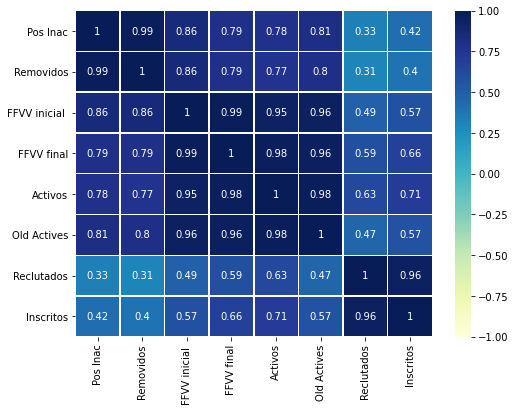

In [13]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(filtered_resultados.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);

In [36]:
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [39]:
X = filtered_resultados[['Activos', 'Old Actives']]
Y = filtered_resultados['Reclutados']

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(106, 2)
(71, 2)
(106,)
(71,)


In [45]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_train_predict = lin_model.predict(X_train)
MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = lin_model.predict(X_test)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

Entrenamiento: MSE =7.851046270312413e-23
Pruebas: MSE =8.486538134898136e-23


In [47]:
df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

,valor_real,prediccion
0,16954,16954.0
1,13095,13095.0
2,13384,13384.0
3,6582,6582.0
4,11523,11523.0
5,18511,18511.0
6,13646,13646.0
7,6085,6085.0
8,6979,6979.0
9,11115,11115.0


In [50]:
##Polinomio de segundo Grado
poly_model = LinearRegression()
poly = PolynomialFeatures(degree=3)

Xpolytrain = poly.fit_transform(X_train)
Xpolytest = poly.fit_transform(X_test)

poly_model.fit(Xpolytrain, Y_train)
y_train_predict = poly_model.predict(Xpolytrain)

MSE = mean_squared_error(Y_train,y_train_predict)
print("Entrenamiento: MSE ="+str(MSE))

y_test_predict = poly_model.predict(Xpolytest)
MSE = (mean_squared_error(Y_test, y_test_predict))
print("Pruebas: MSE ="+str(MSE))

df_predicciones = pd.DataFrame({'valor_real':Y_test, 'prediccion':y_test_predict, 'diferencia':Y_test-y_test_predict})
df_predicciones = df_predicciones.reset_index(drop = True)
df_predicciones.head(10)

Entrenamiento: MSE =0.0003775213572508563
Pruebas: MSE =0.0002973719400437798


,valor_real,prediccion,diferencia
0,16954,16953.998648,0.001352
1,13095,13094.966478,0.033522
2,13384,13384.027269,-0.027269
3,6582,6582.001427,-0.001427
4,11523,11523.011120,-0.011120
5,18511,18511.001489,-0.001489
6,13646,13645.986773,0.013227
7,6085,6085.014973,-0.014973
8,6979,6978.999472,0.000528
9,11115,11115.002335,-0.002335


In [ ]:
serie_1 = df_duracion[['Inscritos']]
serie_2 =df_duracion['Reclutados']

lr = LinearRegression()
lr.fit(serie_1, serie_2)

y_predict = lr.predict(serie_1)

intercept = lr.intercept_
coefficient = lr.coef_[0]
print(f'Reclutados = {coefficient} * Inscritos + {intercept}')

Reclutados = 0.7692798846653203 * Inscritos + -2006.4564462878898


In [ ]:
lr.score(serie_1,serie_2)

0.8874381739865648

In [ ]:
Inscritos = (11719 - intercept)/coefficient
Inscritos

17841.954170242254

In [ ]:
X = df_duracion[['Inscritos']]
y = df_duracion['Reclutados']

X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

lr = LinearRegression()
lr.fit(X_training, y_training)

lr.score(X_test, y_test)

0.8634482846234112

In [ ]:
lr.predict([[18434]])

array([12101.94635675])

In [ ]:
X = df_duracion[['FFVV Inic']]
y = df_duracion['Reclutados']
lr = LinearRegression()
lr.fit(X,y)

y_predict = lr.predict(X)

intercept_REC = lr.intercept_
coefficient_REC = lr.coef_[0]


print(f'Reclutados = {intercept_REC} + {coefficient_REC} * FFVV')

Reclutados = 5939.661368905948 + 0.04054492902387444 * FFVV


In [ ]:
Reclutados = intercept_REC + coefficient_REC * 113426
Reclutados

10538.51048836793

In [ ]:
Inscritos = (Reclutados - intercept)/coefficient
Inscritos

16307.415785496045

In [ ]:
CR = Reclutados/ Inscritos
CR

0.6462403747466212

In [ ]:
df_2 = pd.read_csv('drive/MyDrive/Proyecto/BM-2.csv')

In [ ]:
df_2.head()

,Year,Catálogo,Pos Inac,Removidos,FFVV inicial,FFVV final,Activos,Old Actives,Reclutados,Inscritos,Tasa de Recl,Conversión a Rec,Unnamed: 12,Descripción
0,2011,C01,4856,4057,43105,44546,27490,23804,3686,4819,8.6%,76%,Cierre Ixtapa 20 km rec,NaN
1,2011,C02,5980,4758,44546,45071,31413,28726,2687,4636,6.0%,58%,Campaña de PRIMAVERA,NaN
2,2011,C03,6848,5451,45071,43690,30389,28152,2237,4386,5.0%,51%,NaN,NaN
3,2011,C04,4678,3922,43690,51334,36234,26541,9693,14525,22.2%,67%,"Croc Regional Campaign\nx1, x2, x3 rec (4 weeks)",PR1
4,2011,C05,5755,4738,51334,56935,37802,28915,8887,10285,17.3%,86%,NaN,NaN


In [ ]:
df_filtered2 =df_2[['Pos Inac','Removidos','FFVV inicial ','FFVV final','Activos','Old Actives','Reclutados','Inscritos','Tasa de Recl','Conversión a Rec','Descripción']]

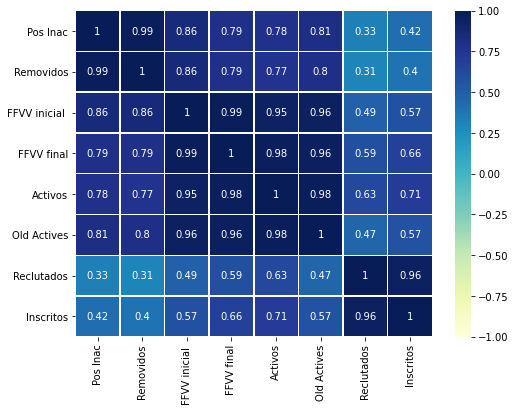

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(df_filtered2.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5);